In [1]:
import pickle as pkl
from fragments.params import ParamStorage
from fragments.strategy import CrossoverStrategy
from fragments.indicators import RSI, SMA
from fragments.optim import optimize
from fragments.stats import equity, plot

%matplotlib inline

In [2]:
with open("../data/GOOG.pkl", "rb") as f:
    ohlcv_list = pkl.load(f)

param_storage = ParamStorage()
strategies = list()
strategies.append(CrossoverStrategy(SMA(param_storage), SMA(param_storage), param_storage))
results = optimize(strategies[-1], equity, ohlcv_list, random_state=42, initial_point_generator="sobol")

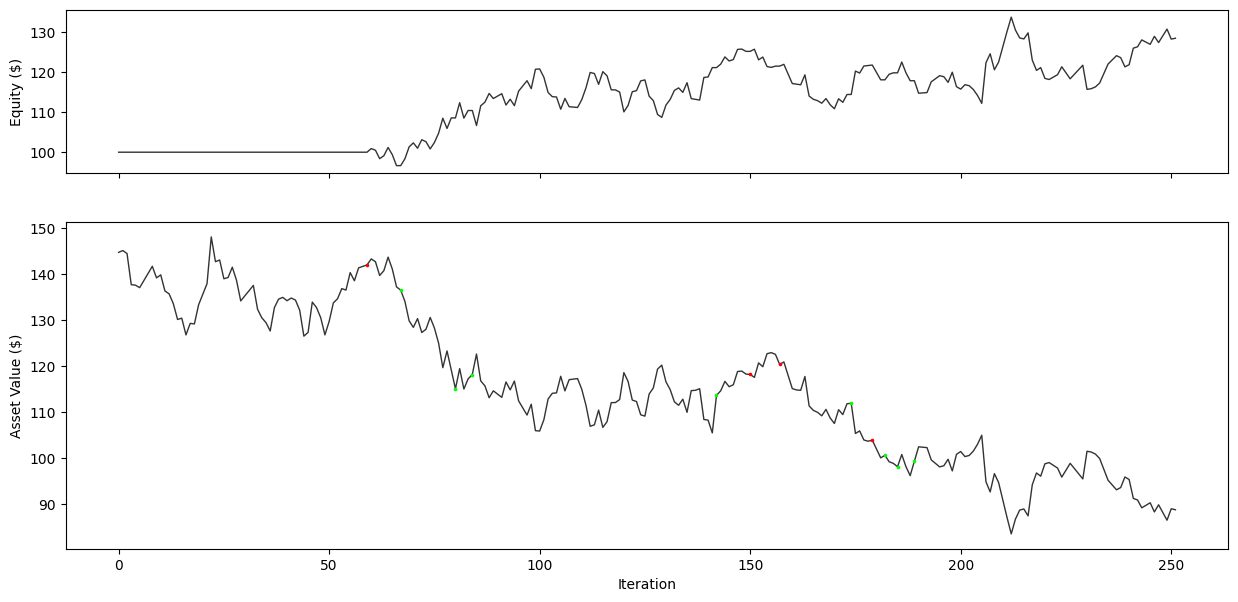

In [3]:
plot(strategies[-1], ohlcv_list)

In [4]:
from pprint import pprint
pprint(strategies[-1].trades)

[Trade(direction=1,
       value=100,
       iteration=60,
       fee=0.0,
       profit=-3.8640371456658187,
       liquidation=False,
       duration=9,
       _prev_ohlcv=(136.6179962158203,
                    137.70150756835938,
                    134.8572540283203,
                    136.46499633789062,
                    19448000)),
 Trade(direction=2,
       value=96.13596285433418,
       iteration=68,
       fee=0.0,
       profit=15.107077573664384,
       liquidation=False,
       duration=14,
       _prev_ohlcv=(114.37300109863281,
                    117.5,
                    113.12425231933594,
                    115.02050018310547,
                    62238000)),
 Trade(direction=1,
       value=100,
       iteration=81,
       fee=0.0,
       profit=2.7029974263010956,
       liquidation=False,
       duration=5,
       _prev_ohlcv=(116.76499938964844,
                    119.30000305175781,
                    116.62699890136719,
                    118.129501342